<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_27792\3904708665.py:5: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_excel('.\content\BASE DE DATOS DE PRECIOS DE GASOLINA.xlsx', header=1)


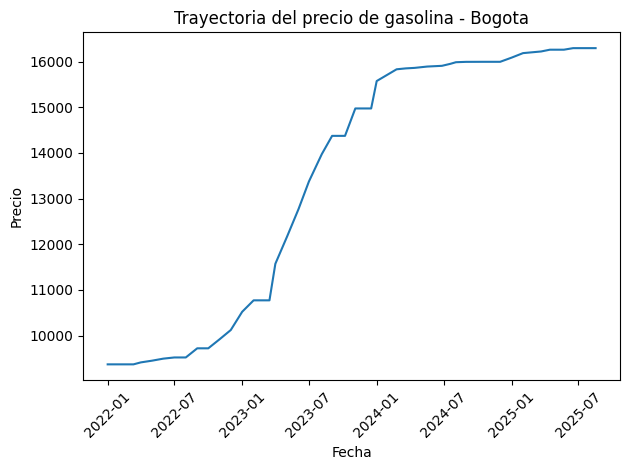

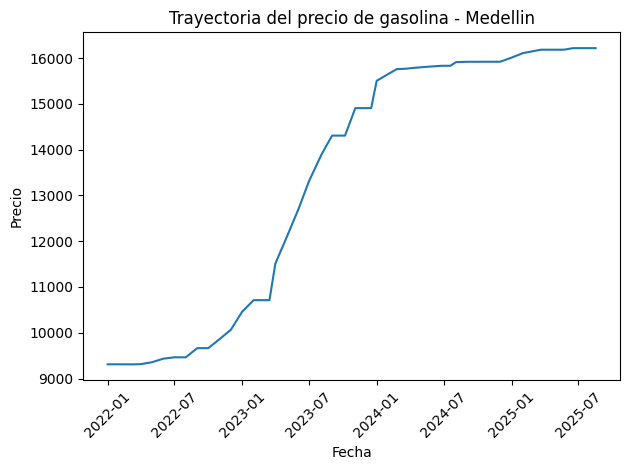

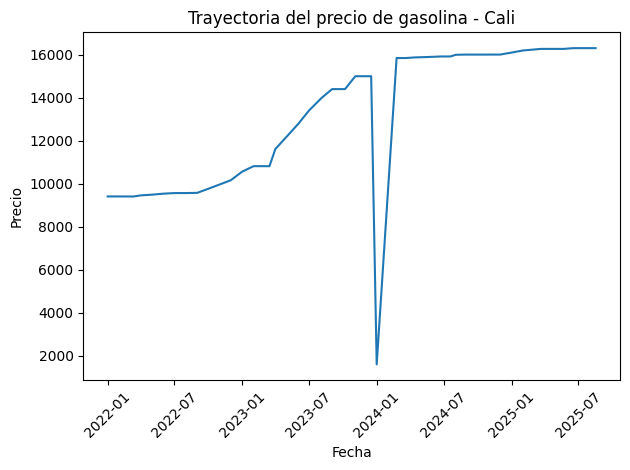

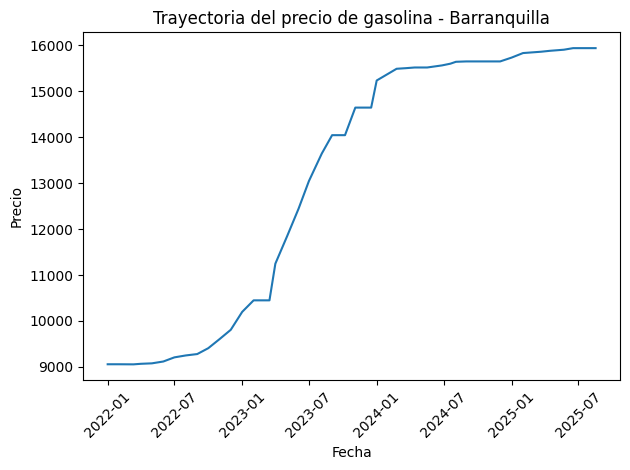

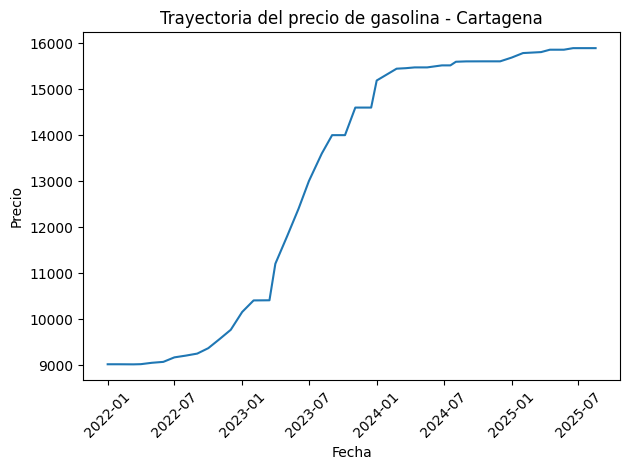

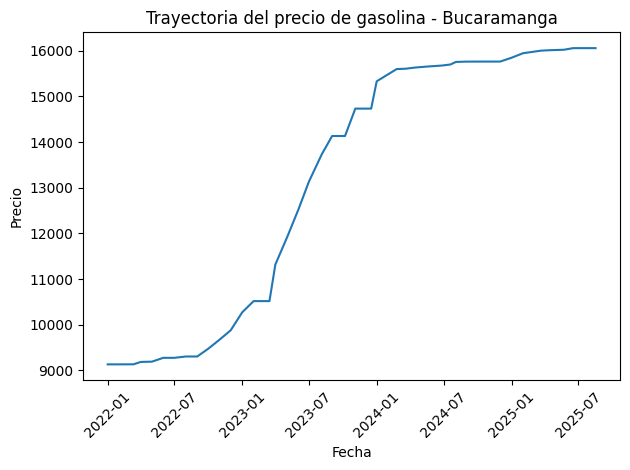

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_excel('.\content\BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx', header=1)
df = df.drop(columns=[df.columns[0]])
df.columns = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga','Fecha']
df = df[df['Fecha'] != 'Fecha']
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Sort by date
df = df.sort_values('Fecha')

# Plot trajectories
for city in ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga']:
    plt.figure()
    plt.plot(df['Fecha'], df[city].astype(float))
    plt.title(f'Trayectoria del precio de gasolina - {city}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<iframe src="gasolina_interactiva.html" width="100%" height="600"></iframe>

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_27792\2387247632.py:6: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA.xlsx", header=1)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_27792\2387247632.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


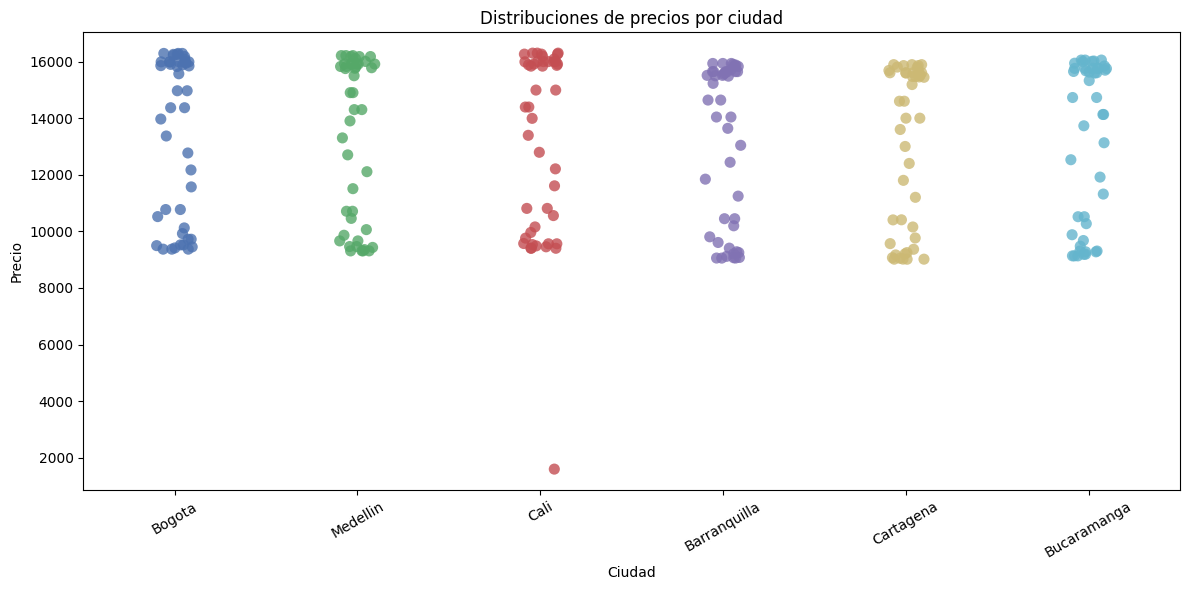

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cargar datos ---
df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA.xlsx", header=1)

# Limpiar tabla
df = df.drop(columns=[df.columns[0]])
df.columns = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga","Fecha"]
df = df[df["Fecha"] != "Fecha"]

# Convertir a formato largo
df_long = df.melt(id_vars="Fecha",
                  var_name="Ciudad",
                  value_name="Precio")

df_long["Precio"] = pd.to_numeric(df_long["Precio"], errors="coerce")

# --- Colores definidos por ciudad ---
colores = {
    "Bogota": "#4C72B0",        # azul
    "Medellin": "#55A868",      # verde
    "Cali": "#C44E52",          # rojo
    "Barranquilla": "#8172B3",  # morado
    "Cartagena": "#CCB974",     # dorado
    "Bucaramanga": "#64B5CD"    # turquesa
}

# Gráfico
plt.figure(figsize=(12,6))
sns.stripplot(
    data=df_long,
    x="Ciudad",
    y="Precio",
    jitter=True,
    alpha=0.8,
    size=8,
    palette=colores
)

plt.title("Distribuciones de precios por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_27792\1058688959.py:8: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA.xlsx", header=1)


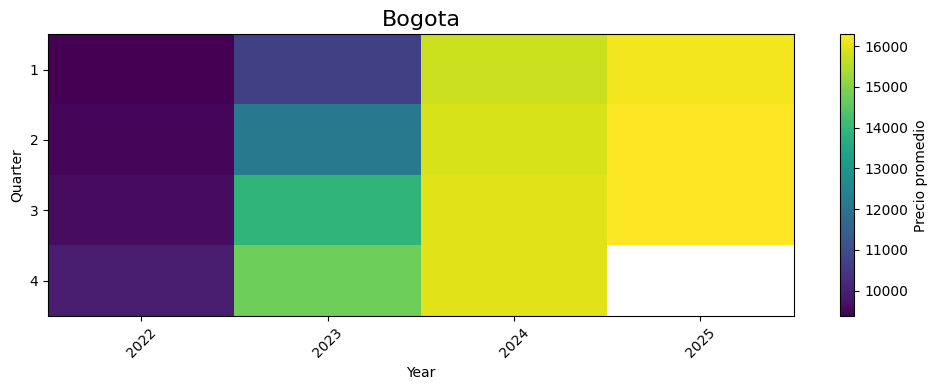

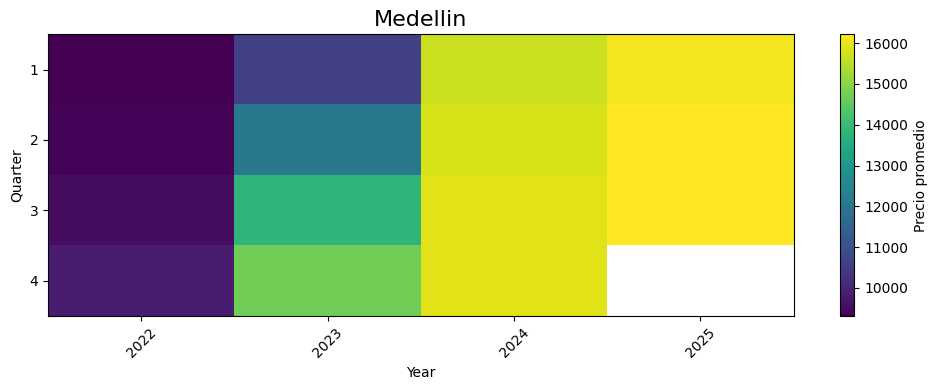

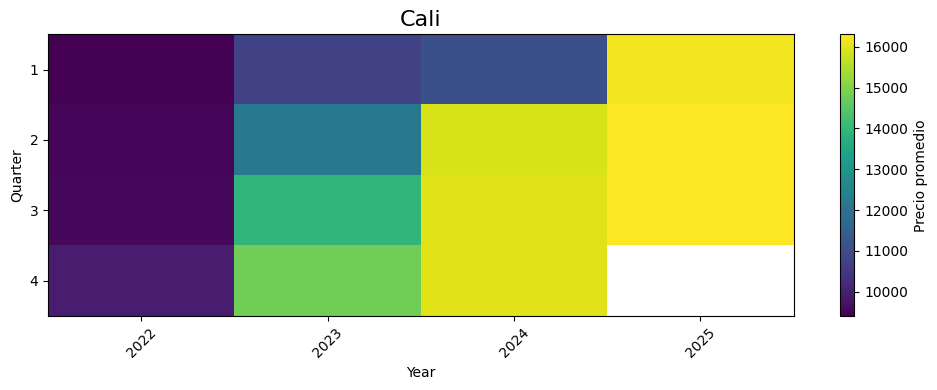

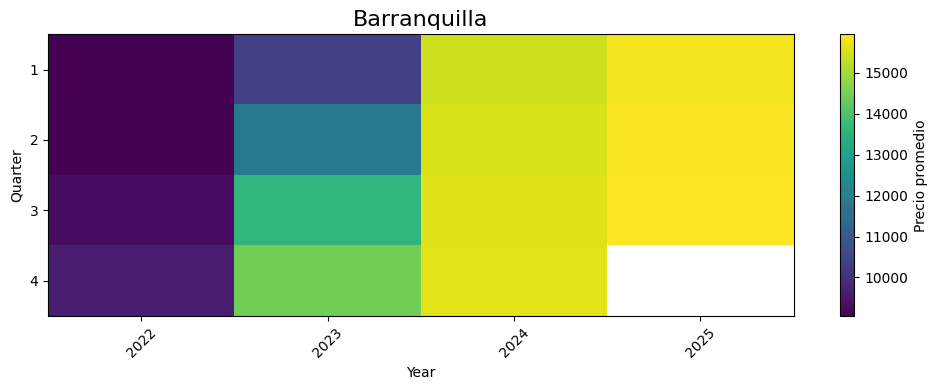

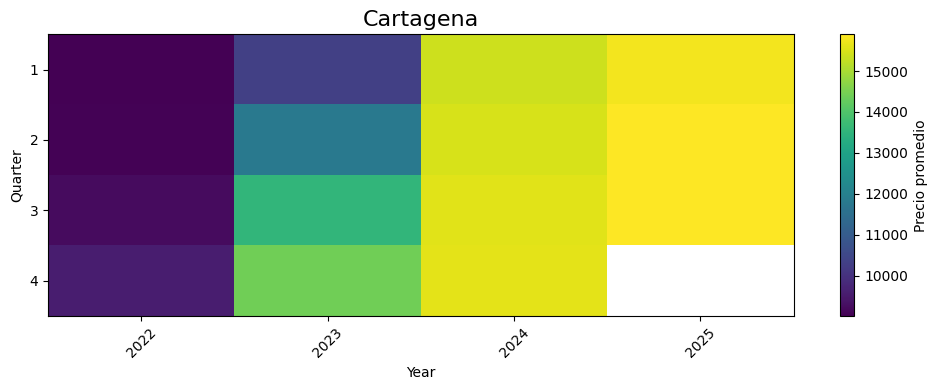

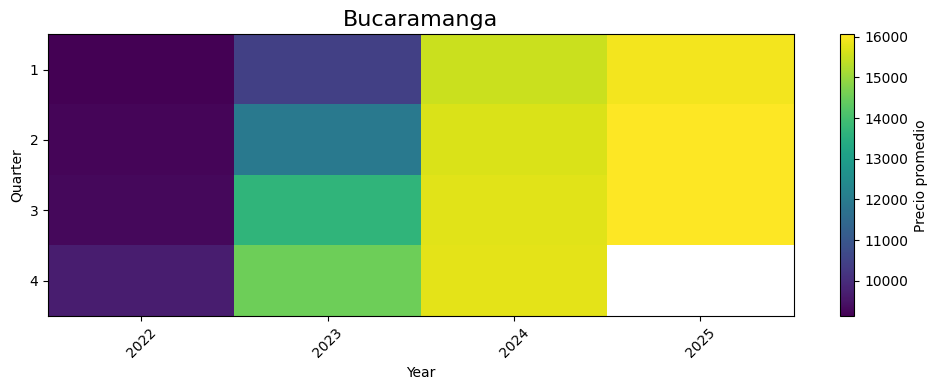

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------
# 1. Cargar y limpiar datos
# -----------------------
df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA.xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga","Fecha"]

df = df[df["Fecha"] != "Fecha"]
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

ciudades = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga"]

for c in ciudades:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# -----------------------
# 2. Crear año y trimestre
# -----------------------
df["Año"] = df["Fecha"].dt.year
df["Trimestre"] = df["Fecha"].dt.quarter

# -----------------------
# 3. Función para generar mapa de calor por ciudad
# -----------------------
def heatmap_ciudad(ciudad):

    tabla = df.groupby(["Año", "Trimestre"])[ciudad].mean().unstack()

    plt.figure(figsize=(10,4))

    plt.imshow(tabla.T, cmap="viridis", aspect="auto")

    plt.title(ciudad, fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Quarter")

    plt.xticks(ticks=np.arange(len(tabla.index)), labels=tabla.index, rotation=45)
    plt.yticks(ticks=[0,1,2,3], labels=["1","2","3","4"])

    cbar = plt.colorbar()
    cbar.set_label("Precio promedio")

    plt.tight_layout()
    plt.show()

# -----------------------
# 4. Generar heatmap para cada ciudad
# -----------------------
for ciudad in ciudades:
    heatmap_ciudad(ciudad)

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_27792\3036027093.py:8: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA.xlsx", header=1)


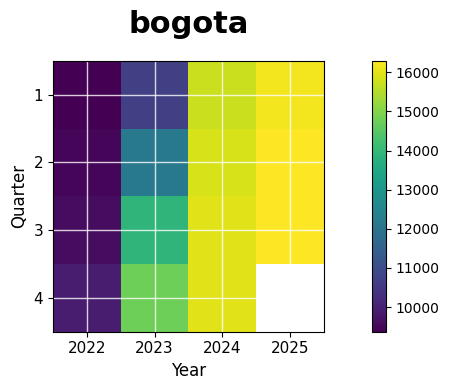

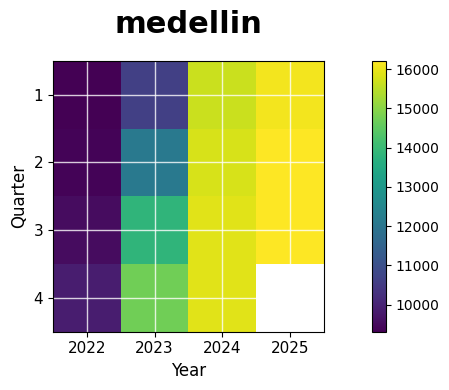

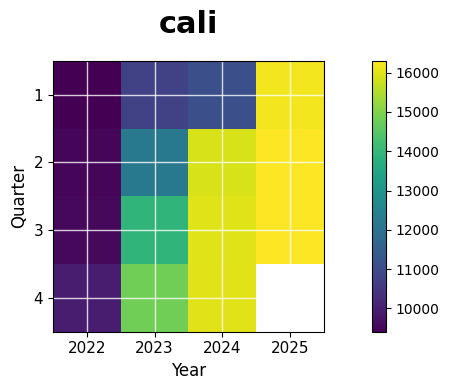

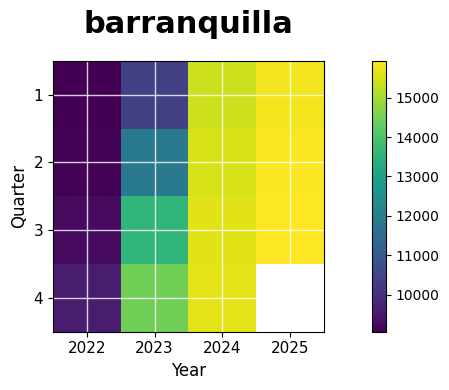

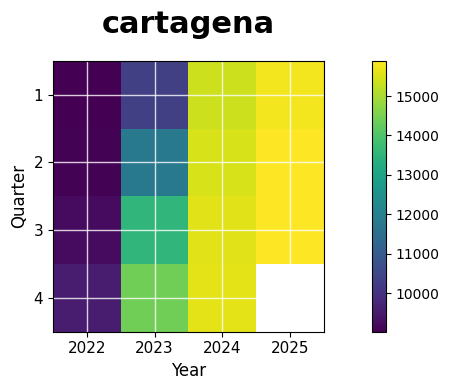

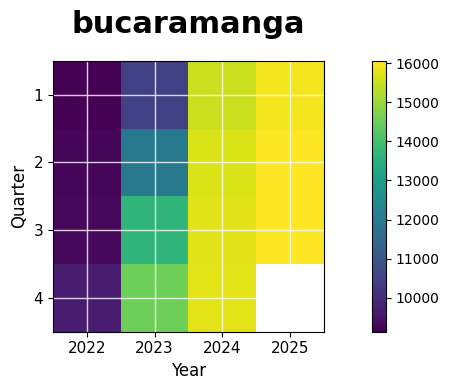

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------
# 1. Cargar y preparar datos
# -----------------------
df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA.xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga","Fecha"]
df = df[df["Fecha"] != "Fecha"]

df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

ciudades = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga"]

for c in ciudades:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["Año"] = df["Fecha"].dt.year
df["Trimestre"] = df["Fecha"].dt.quarter


# -----------------------
# 2. Función con estética idéntica a tu imagen
# -----------------------
def heatmap_ciudad(ciudad):

    tabla = df.groupby(["Año", "Trimestre"])[ciudad].mean().unstack()

    plt.figure(figsize=(10, 4))

    # heatmap estilo cuadrado
    plt.imshow(
        tabla.T,
        cmap="viridis",      # Colormap igual a ejemplo
        aspect="equal",      # Cuadrados perfectos
        interpolation="none" # Sin suavizado
    )

    # Título similar al ejemplo
    plt.title(
        ciudad.lower(),
        fontsize=22,
        fontweight="semibold",
        pad=20
    )

    # Etiquetas estéticas
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Quarter", fontsize=12)

    # Eje X (años)
    plt.xticks(
        ticks=np.arange(len(tabla.index)),
        labels=tabla.index,
        fontsize=11
    )

    # Eje Y (trimestres)
    plt.yticks(
        ticks=[0,1,2,3],
        labels=["1","2","3","4"],
        fontsize=11
    )

    # Cuadrícula estilo suave
    plt.grid(
        color="white",
        linestyle="-",
        linewidth=1,
        alpha=0.8
    )

    # Barra de color estilo foto
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=10)

    plt.tight_layout()
    plt.show()


# -----------------------
# 3. Generar mapas de calor para cada ciudad
# -----------------------
for ciudad in ciudades:
    heatmap_ciudad(ciudad)

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_27792\2864630448.py:8: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA.xlsx", header=1)


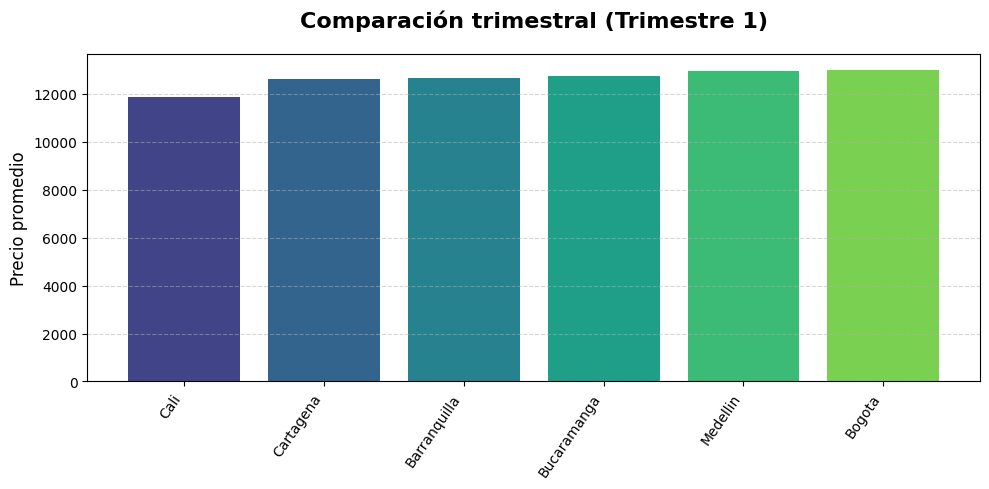

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------
# 1. Cargar datos
# -----------------------
df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA.xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga","Fecha"]
df = df[df["Fecha"] != "Fecha"]

df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

ciudades = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga"]

for c in ciudades:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["Año"] = df["Fecha"].dt.year
df["Trimestre"] = df["Fecha"].dt.quarter


# -----------------------
# 2. Seleccionar trimestre
# -----------------------
trimestre = 1   # ← Cambia aquí 1, 2, 3 o 4


# -----------------------
# 3. Calcular promedios por ciudad
# -----------------------
promedios = {}

for ciudad in ciudades:
    promedios[ciudad] = df[df["Trimestre"] == trimestre][ciudad].mean()

# Ordenar por valor (opcional)
ciudades_ord = sorted(promedios, key=promedios.get)
valores_ord = [promedios[c] for c in ciudades_ord]


# -----------------------
# 4. Gráfica de barras estilo la foto
# -----------------------
plt.figure(figsize=(10,5))

plt.bar(
    ciudades_ord,
    valores_ord,
    color=plt.cm.viridis(np.linspace(0.2,0.8,len(ciudades_ord)))  # tonos azul/verde suaves
)

plt.title(f"Comparación trimestral (Trimestre {trimestre})",
          fontsize=16, fontweight="bold", pad=20)

plt.ylabel("Precio promedio", fontsize=12)

# Rotar etiquetas como en la imagen
plt.xticks(rotation=55, ha="right", fontsize=10)

# Cuadrícula suave en eje Y
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [39]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# -----------------------
# 1. Cargar y preparar datos
# -----------------------
df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA.xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga","Fecha"]
df = df[df["Fecha"] != "Fecha"]

df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
df = df.sort_values("Fecha")

ciudades = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga"]
for c in ciudades:
    df[c] = pd.to_numeric(df[c], errors="coerce")


# -----------------------
# 2. Elegir ciudad para la prueba ADF
# -----------------------
ciudad = "Bogota"   # ← Cambia aquí la ciudad

serie = df[ciudad].dropna()


# -----------------------
# 3. Aplicar prueba Dickey-Fuller
# -----------------------
resultado = adfuller(serie)

print(f"Resultados ADF para {ciudad}:")
print("-------------------------------------------")
print(f"ADF Statistic: {resultado[0]}")
print(f"p-value: {resultado[1]}")
print("Valores críticos:")
for key, value in resultado[4].items():
    print(f"   {key}: {value}")

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_27792\460039890.py:7: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA.xlsx", header=1)


Resultados ADF para Bogota:
-------------------------------------------
ADF Statistic: -1.6820149584461843
p-value: 0.4404019188310303
Valores críticos:
   1%: -3.596635636000432
   5%: -2.933297331821618
   10%: -2.6049909750566895


In [40]:
df["Bogota_diff"] = df["Bogota"].diff()
